## Part2: Training a neural network

## Imports

In [3]:
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import tensorflow as tf
%run utils.ipynb import *

## Prepare the data

In [5]:
# load training data
train = read_data('train.csv')
# load testing data
test = read_data('test.csv')

In [6]:
# clean the data
X_train_scaled, y_train_encoded, X_test_scaled, y_train_unique_length = clean_data(train, test)

### Hyperparameters settings #3 : Hidden size Tuning

We will explore second hyperparameter which is **Hidden size** while keeping all other hyperparameters fixed

In [9]:
BATCH_SIZE = 32
hidden_size = [32, 64, 128, 256, 512]
LEARNING_RATE = 8e-2
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
DROPOUT_RATE = 0
DROPOUT = False

### Training the model #3

Start training for Hidden size = 32

The Evaluation of the model on the train data is:
Train loss = 0.06047702208161354
Train accuracy = 0.9888888597488403

End training for Batch size = 32

Start training for Hidden size = 64

The Evaluation of the model on the train data is:
Train loss = 0.03808177635073662
Train accuracy = 0.9898989796638489

End training for Batch size = 64

Start training for Hidden size = 128

The Evaluation of the model on the train data is:
Train loss = 0.027719007804989815
Train accuracy = 0.991919219493866

End training for Batch size = 128

Start training for Hidden size = 256

The Evaluation of the model on the train data is:
Train loss = 0.023098990321159363
Train accuracy = 0.9939393997192383

End training for Batch size = 256

Start training for Hidden size = 512

The Evaluation of the model on the train data is:
Train loss = 0.023321624845266342
Train accuracy = 0.9909090995788574

End training for Batch size = 512



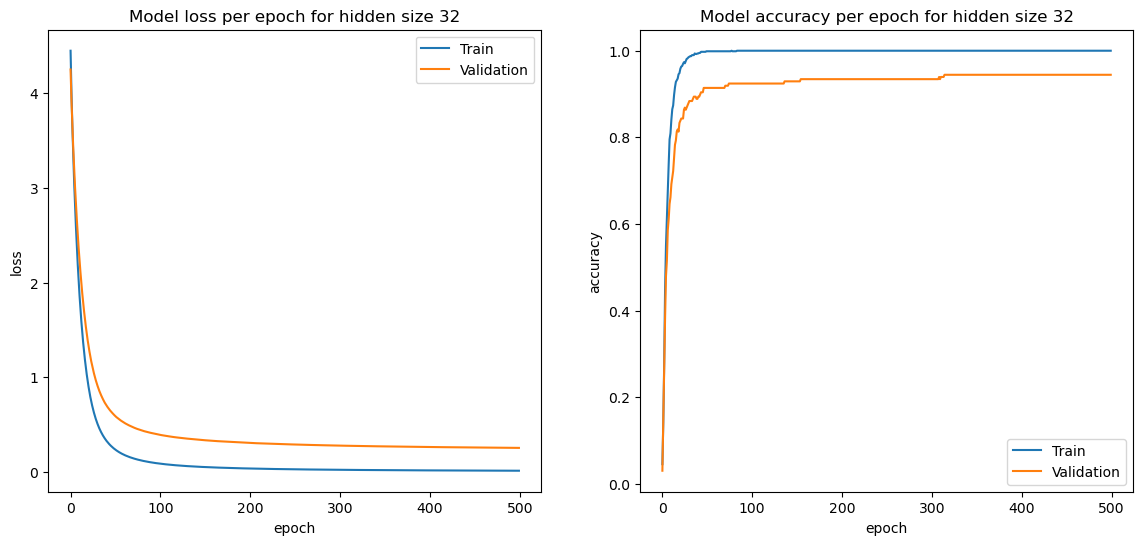

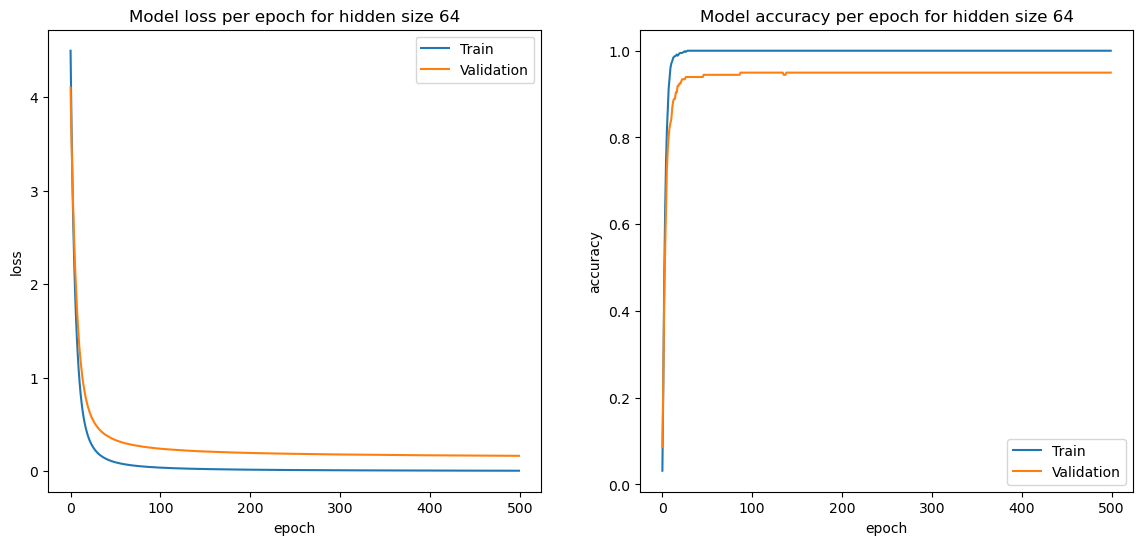

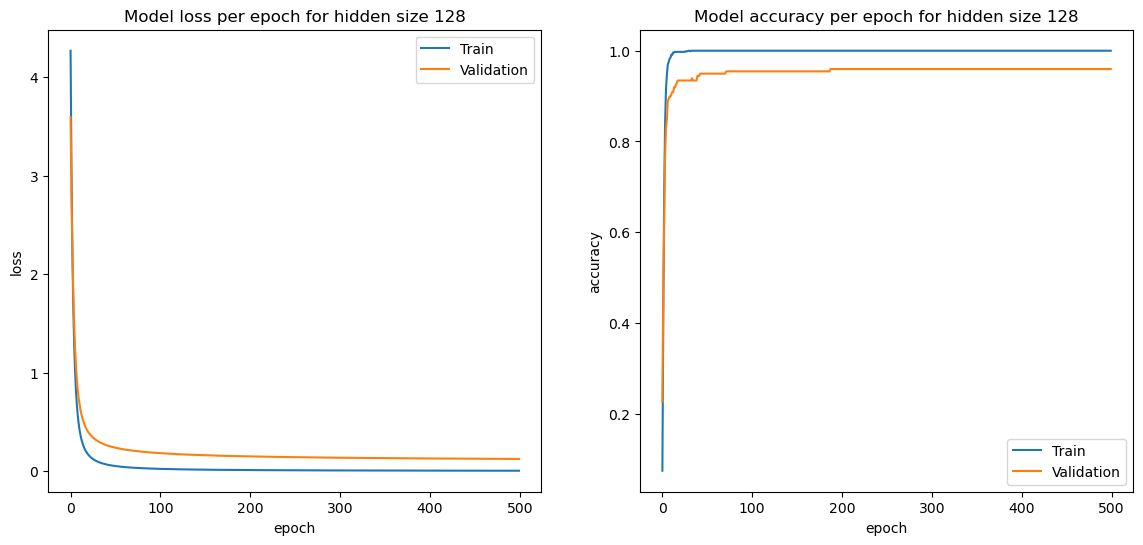

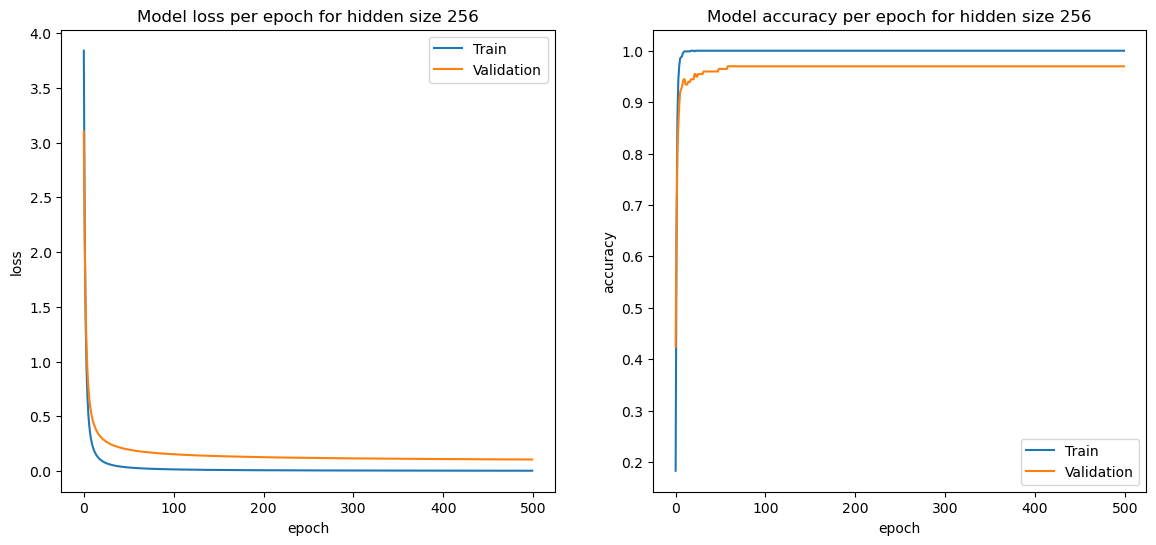

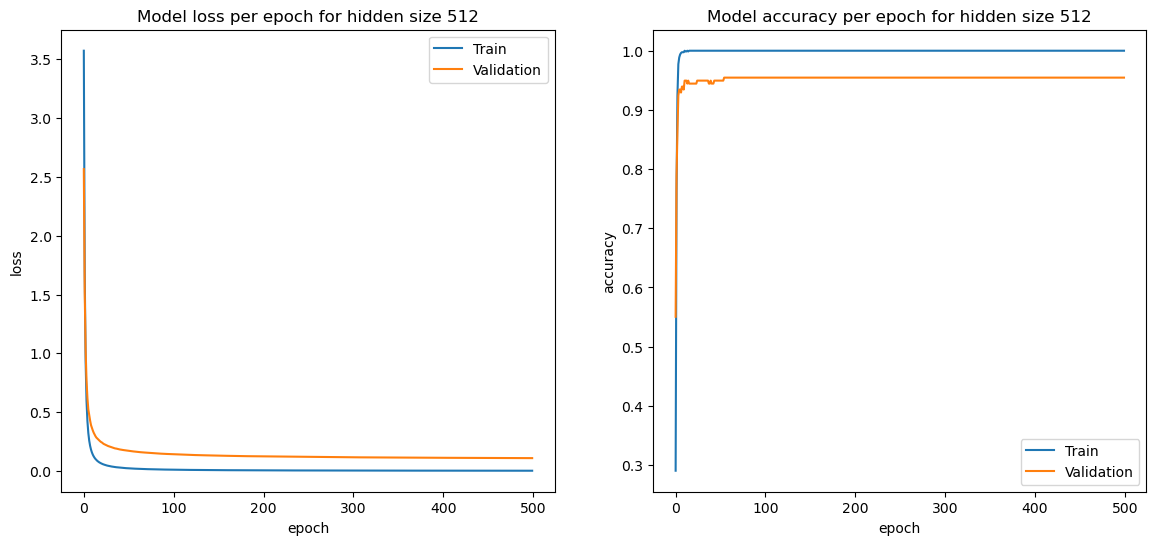

In [11]:
for hidden in hidden_size:
    print('Start training for Hidden size =', str(hidden))
    model = DenseMLP(input_shape= X_train_scaled.shape, hidden_size= hidden, output_size= y_train_unique_length, 
                     dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
    history = training(model, tf.cast(X_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), BATCH_SIZE,
                        OPTIMIZER, None,None)
    train_curves(history,'for hidden size',hidden)
    loss, acc = evaluation(model= model, X= X_train_scaled, y= y_train_encoded, batch_size= BATCH_SIZE)
    print('\nThe Evaluation of the model on the train data is:')
    print('Train loss =',loss)
    print('Train accuracy =', acc)
    print('\nEnd training for Batch size =', str(hidden) + '\n')

So, from above the best hidden size to be used is **256**